In [1]:
# -*- coding: utf-8 -*-

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap
from aggmap import show, loadmap

In [2]:
dataset = './dataset/dataset_1647_all.csv'
data_df = pd.read_csv(dataset)
dfx = data_df[data_df.columns[1:-42]]
dfy = data_df[data_df.columns[-42:]]

In [3]:
print(dfx.shape)
print(dfy.shape)

(8272, 1647)
(8272, 42)


In [5]:
channels = 10
metric = 'correlation'

In [11]:
mp = AggMap(dfx, metric=metric)
mp.fit(cluster_channels=channels, verbose=0)

2022-12-30 16:54:13,193 - INFO - [bidd-aggmap] - Calculating distance ...
2022-12-30 16:54:13,264 - INFO - [bidd-aggmap] - the number of process is 16


100%|###################################################################################################################| 824/824 [00:01<00:00, 585.22it/s]


2022-12-30 16:54:27,986 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-12-30 16:54:32,161 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-12-30 16:54:33,252 - INFO - [bidd-aggmap] - Finished


In [6]:
# mp.save('./model/824p_IR_aggmap_{}_c{}.mp'.format(metric, channels))
mp = loadmap('./model/1647_IR_aggmap_correlation_c{}.mp'.format(channels))

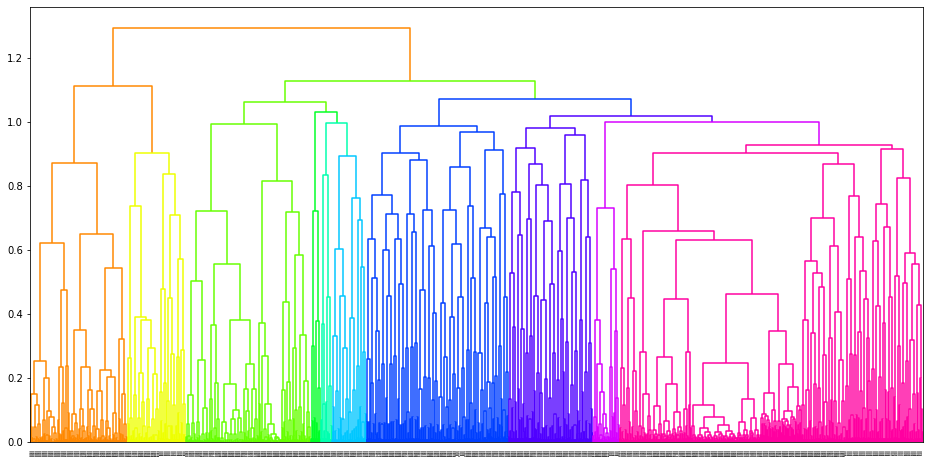

In [15]:
fig_tree = mp.plot_tree(leaf_font_size = 2)
fig_tree.savefig('./result_fmp/1647_IR_cluster{}_tree_{}.png'.format(channels, metric), bbox_inches='tight', dpi=300)

In [16]:
mp.plot_scatter(enabled_data_labels=True, htmlname='1647_IR_cluster{}_scatter_{}'.format(channels, metric),radius=5)

2022-12-30 17:03:34,308 - INFO - [bidd-aggmap] - generate file: ./1647_IR_cluster10_scatter_correlation_feature points_1647_correlation_umap_scatter
2022-12-30 17:03:34,356 - INFO - [bidd-aggmap] - save html file to ./1647_IR_cluster10_scatter_correlation_feature points_1647_correlation_umap_scatter


In [15]:
mp.plot_grid(enabled_data_labels=True, htmlname='1647_IR_cluster{}_grid_{}'.format(channels, metric))

2024-02-16 19:08:27,084 - INFO - [bidd-aggmap] - generate file: ./1647_IR_cluster10_grid_correlation_feature points_1647_correlation_umap_mp
2024-02-16 19:08:27,126 - INFO - [bidd-aggmap] - save html file to ./1647_IR_cluster10_grid_correlation_feature points_1647_correlation_umap_mp


In [7]:
X = dfx.values
#Y = pd.get_dummies(dfy['alkane']).values.astype(float)

In [8]:
print(X.shape)
#print(Y.shape)

(8272, 1647)


In [9]:
trans_X = mp.batch_transform(X, scale_method='standard') # 'standard', 'minmax'
print(trans_X.shape)  # sample_amount, fmp_width, fmp_height, channel

100%|##########| 8272/8272 [01:00<00:00, 137.48it/s]


In [83]:
# row_cnt = Y.shape[1]
row_cnt = 3
col_cnt = 3
# save_map_path = './featureMap/featureMap_824p_correlation_c{}_{}.png'.format(channels, metric)

In [81]:
# 根据 CAS ID 展示指定化合物的Fmap
data_id = data_df['ID']
fig_idxes = []
cas_idxes = ['C87854', 'C1077163', 'C100185', 'C102250', 'C99627',
             'C14411564', 'C7397060', 'C39916615', 'C7364194']  # all formula = C12H18
for idx in cas_idxes:
    fig_idx = data_id[data_id.values == idx].index.values[0]
    fig_idxes.append(fig_idx)
print(fig_idxes)

[7731, 472, 12, 141, 8243, 1432, 7075, 4339, 7061]


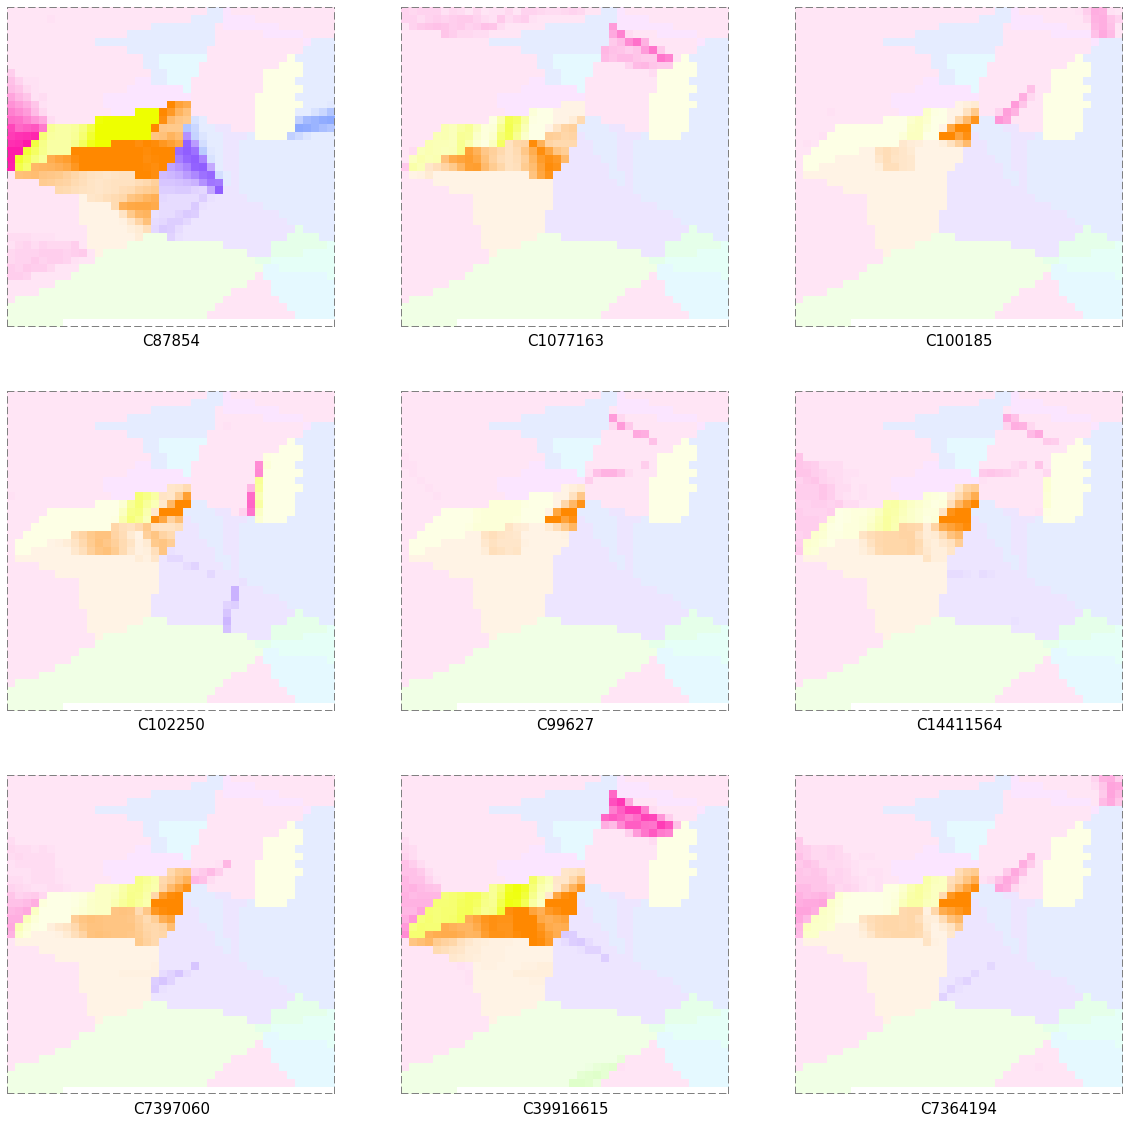

In [90]:
figure, axes = plt.subplots(nrows=row_cnt, ncols=col_cnt, figsize=(20,20), sharex=True, sharey=True)
# fig_idx = 0
idx = 0

for row_ax in axes:
    for ax in row_ax:
        fig_idx = fig_idxes[idx]
        fig_name = data_df.loc[fig_idx]['ID']
        fig = trans_X[fig_idx]
        show.imshow(fig, ax=ax, mode='light', color_list=pd.Series(mp.colormaps).tolist(), x_max=1, vmin=0, vmax=2)  # x_max是饱和度的基数
        ax.set_xlabel(fig_name, fontsize=15)
        # fig_idx += 1
        idx += 1


In [39]:
# figure.tight_layout()
# figure.savefig(save_map_path, bbox_inches='tight', dpi=400)

3962


Text(0.5, 37.5, 'C35161707')

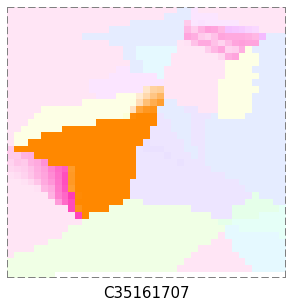

In [17]:
# 画出指定化合物的Fmap
casID = 'C35161707'
for idx, item in data_df.iterrows():
    if item['ID'] == casID:
        fid = idx
        break
print(fid)
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

f = trans_X[fid]
show.imshow(f, ax=axes, mode='light', color_list=pd.Series(mp.colormaps).tolist(), x_max=1, vmin=0, vmax=1)
axes.set_xlabel(casID, fontsize=15)